### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [155]:
# your code and solutions

import pandas as pd

file = 'The E-commerce Dataset.csv'
columns = ['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness', 'gender','category', 'item_id', 'item_price','user_city']
data = pd.read_csv(file)
data


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [156]:
data.shape

(20000, 11)

In [198]:
# checking dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 78 to 19990
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 251.7+ KB


In [199]:
# Count null values in each column
data.isnull().sum()

userId         0
timestamp      0
review         0
item           0
rating         0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
dtype: int64

In [157]:
# check the length before removing missing data
length_before = len(data)
print("Length before removing missing data: ",length_before)

Length before removing missing data:  20000


In [158]:
# Clean data
data = data.dropna(subset=['gender', 'rating', 'helpfulness'])
data = data[data['review'] != 'none']
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [159]:
# Length after removing missing data
length_after = len(data)
print("Length after removing missing data: ",length_after)

Length after removing missing data:  19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [161]:
# Q2.1 
unique_users = data['userId'].nunique()
unique_reviews = data['review'].nunique()
unique_items = data['item_id'].nunique()
unique_categories = data['category'].nunique()

print("Total number of unique users: ", unique_users)
print("Total number of unique reviews: ", unique_reviews)
print("Total number of unique items: ",unique_items)
print("Total number of unique categories: ", unique_categories)

Total number of unique users:  8562
Total number of unique reviews:  19459
Total number of unique items:  89
Total number of unique categories:  9


In [162]:
# Q2.2 
data['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [200]:
count_rating = data['rating'].count()
mean_rating = data['rating'].mean()
std_rating = data['rating'].std()
min_rating = data['rating'].min()
max_rating = data['rating'].max()

print("Total number of ratings: ", count_rating)
print("Mean rating: ", mean_rating)
print("Standard deviation of ratings: ", std_rating)
print("Minimum rating: ", min_rating)
print("Maximum rating: ", max_rating)

Total number of ratings:  2685
Mean rating:  3.7050279329608937
Standard deviation of ratings:  1.346240296900555
Minimum rating:  1.0
Maximum rating:  5.0


In [181]:
# Q2.3
#Calculate mean, std, max, and min of the number of items rated by male

male_data = data[data['gender'] == 'M']
male_data['rating'].describe()

print("Mean of the number of items rated by male: ", male_data['rating'].mean())
print("Standard deviation of the number of items rated by male: ", male_data['rating'].std())
print("Minimum of the number of items rated by male: ", male_data['rating'].min())
print("Maximum of the number of items rated by male: ", male_data['rating'].max())

Mean of the number of items rated by male:  3.6609808102345416
Standard deviation of the number of items rated by male:  1.3449467741804075
Minimum of the number of items rated by male:  1.0
Maximum of the number of items rated by male:  5.0


In [182]:
#Calculate mean, std, max, and min of the number of items rated by female 

female_data = data[data['gender'] == 'F']
female_data['rating'].describe()

print("Mean of the number of items rated by female: ", female_data['rating'].mean())
print("Standard deviation of the number of items rated by female: ", female_data['rating'].std())
print("Minimum of the number of items rated by female: ", female_data['rating'].min())
print("Maximum of the number of items rated by female: ", female_data['rating'].max())

Mean of the number of items rated by female:  3.7535211267605635
Standard deviation of the number of items rated by female:  1.3465228734816874
Minimum of the number of items rated by female:  1.0
Maximum of the number of items rated by female:  5.0


In [222]:
#Q2.4

#count the rating in each item
item_rating_counts = data['item_id'].value_counts()
item_rating_counts

0     93
41    73
1     72
88    71
47    68
      ..
77    13
59    13
55    12
14    12
10    11
Name: item_id, Length: 82, dtype: int64

In [223]:
# Loop through each unique item
for item_id in item_rating_counts.index:
    # Get ratings for the current item
    item_data = data[data['item_id'] == item_id]
        
    # Count the number of ratings for each rating level (1.0 to 5.0)
    rating_level_counts = item_data['rating'].value_counts().sort_index()
    
    
# Loop through each item then calculate descriptive statistics
for item_id, rating_counts in item_rating_level_counts.items():
    mean_count = rating_counts.mean()
    std_count = rating_counts.std()
    max_count = rating_counts.max()
    min_count = rating_counts.min()

    print("Item ID: ", item_id)
    print("Mean count: ", mean_count)
    print("Standard deviation: ", std_count)
    print("Max count: ", max_count)
    print("Min count: ",min_count)

Item ID:  0
Mean count:  18.6
Standard deviation:  4.393176527297759
Max count:  25
Min count:  14
Item ID:  41
Mean count:  14.6
Standard deviation:  5.770615218501404
Max count:  20
Min count:  5
Item ID:  1
Mean count:  14.4
Standard deviation:  7.402702209328699
Max count:  23
Min count:  6
Item ID:  88
Mean count:  17.75
Standard deviation:  18.82153022471871
Max count:  41
Min count:  1
Item ID:  47
Mean count:  13.6
Standard deviation:  16.56200470957547
Max count:  42
Min count:  2
Item ID:  39
Mean count:  15.0
Standard deviation:  13.366625103842281
Max count:  33
Min count:  1
Item ID:  65
Mean count:  13.75
Standard deviation:  13.865424623862047
Max count:  32
Min count:  2
Item ID:  30
Mean count:  10.6
Standard deviation:  9.736529155710468
Max count:  25
Min count:  1
Item ID:  12
Mean count:  10.0
Standard deviation:  2.0
Max count:  12
Min count:  8
Item ID:  33
Mean count:  12.25
Standard deviation:  14.244882121894399
Max count:  33
Min count:  2
Item ID:  86
Mean c

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

Text(0, 0.5, 'Rating')

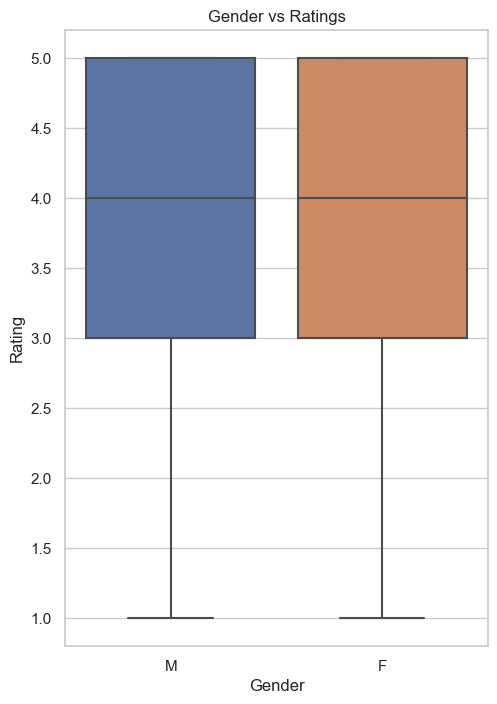

In [226]:
# your code and solutions

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Q3 - Exploring correlation between gender/helpfulness/category and ratings
plt.figure(figsize=(12, 8))

# Plot 1: Boxplot for Gender vs Ratings
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='rating', data=data)
plt.title("Gender vs Ratings")
plt.xlabel("Gender")
plt.ylabel("Rating")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Restaurants & Gourmet'),
  Text(1, 0, 'Movies'),
  Text(2, 0, 'Media'),
  Text(3, 0, 'Kids & Family'),
  Text(4, 0, 'Online Stores & Services'),
  Text(5, 0, 'Games'),
  Text(6, 0, 'Hotels & Travel'),
  Text(7, 0, 'Books'),
  Text(8, 0, 'Personal Finance')])

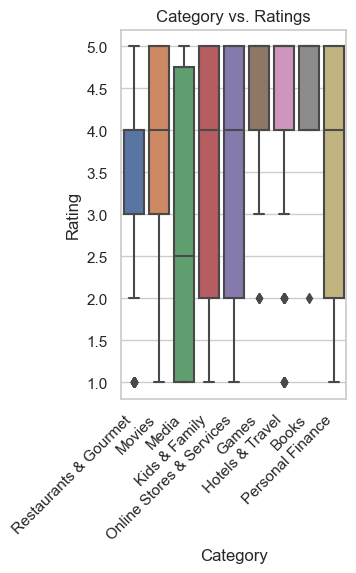

In [225]:
# Plot 2: Category vs. Ratings
plt.subplot(1, 2, 2)
sns.boxplot(x='category', y='rating', data=data)
plt.title("Category vs. Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha="right")

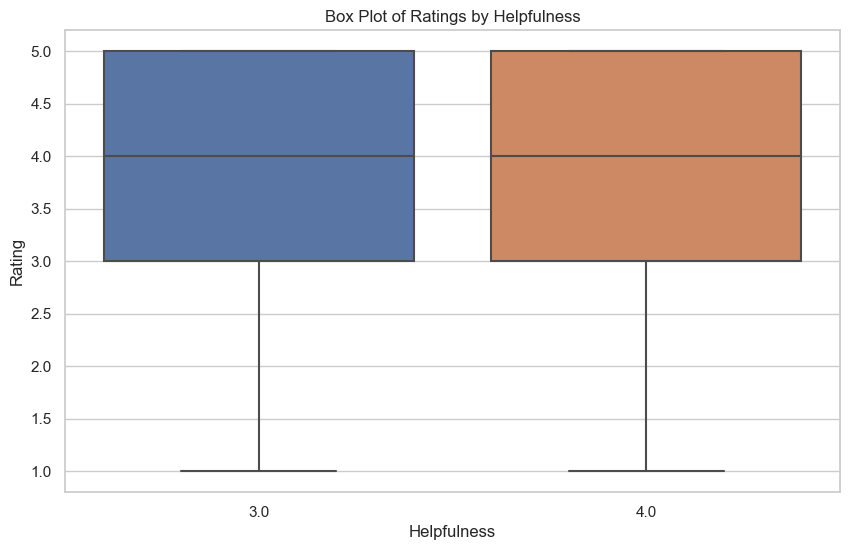

In [227]:
# Box plot for comparing ratings by helpfulness
plt.figure(figsize=(10, 6))
sns.boxplot(x='helpfulness', y='rating', data=data)
plt.title("Box Plot of Ratings by Helpfulness")
plt.xlabel("Helpfulness")
plt.ylabel("Rating")
plt.show()

The overall summary of the data:

The box plots depict the link between gender, helpfulness, category, and ratings. They demonstrate how the data breaks down within each category and help in the identification of structures or differences.  The plots, for example, might show if ratings are higher for a specific gender or category. Overall, these visualisations offer insights into the data and can aid in understanding the relationship between multiple variables and ratings in the e-commerce dataset.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [232]:
#Remove reviews of which the helpfulness is no more than 2

data = data[data['helpfulness'] > 2]
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [234]:
# Remove users who rate less than 7 items
user_item_counts = data['userId'].value_counts()
valid_users = user_item_counts[user_item_counts >= 7].index
data = data[data['userId'].isin(valid_users)]
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [235]:
# Remove items that receive less than 11 ratings
item_rating_counts = data['item_id'].value_counts()
valid_items = item_rating_counts[item_rating_counts >= 11].index
data = data[data['item_id'].isin(valid_items)]
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
78,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
80,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
81,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
82,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
83,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [236]:
length_after_outliers = len(data)
print("Length of the data after removing outliers: ",length_after_outliers)

Length of the data after removing outliers:  2526
